In [52]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import numpy as np

def make_sinewave(f0, dur, fs):
    """Generate a sine wave
    Args:
        f0: waveform frequency in Hz
        dur: duration in seconds
        fs: sample frequency in Hz
    """
    num_samples = int(dur * fs)
    sample_step_size = 2 * np.pi * f0 / fs
    x = sample_step_size * np.arange(num_samples, dtype='float32')
    return np.sin(x)

# Quantization of a sine waveform

Generate a sine waveform of 1 second with frequency 440Hz and sample frequency 44100 and play the audio signal.

In [53]:
fs = 44100
f0=440
sin:np.array = make_sinewave(f0, 1, fs)

In [54]:
# ... WRITE YOUR CODE HERE ... #

Plot the first 512 samples of the waveform and plot the log spectrogram in dB

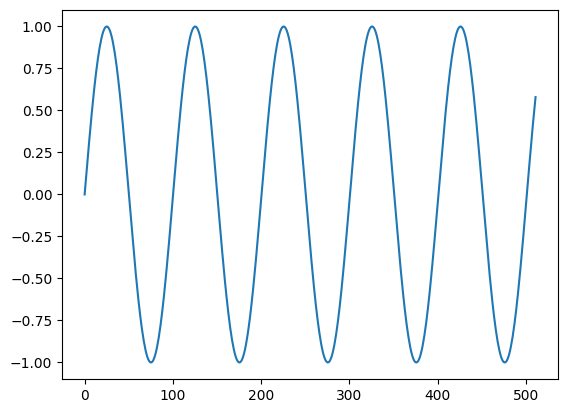

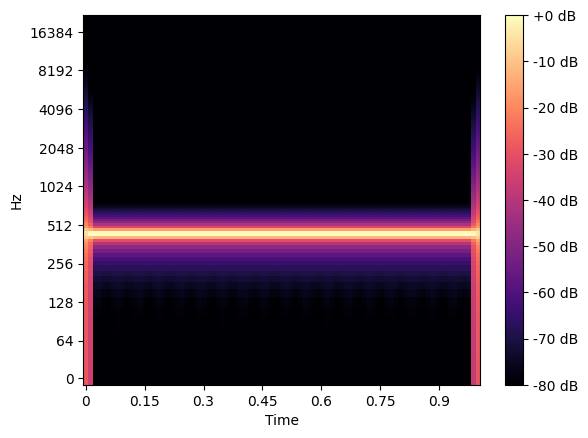

In [55]:
plt.plot(sin[:512])
plt.show()

stft_sin = librosa.stft(sin)
stft_sin_mag_db = librosa.amplitude_to_db(S=np.abs(stft_sin), ref=np.max)
librosa.display.specshow(data=stft_sin_mag_db, y_axis='log', x_axis='time', sr=fs)
plt.colorbar(format='%+2.0f dB')

Write a function that quantizes the waveform to a given number of bits. Make the number of bits a function argument. Call the function with a bitdepth of 4.

HINT: use `np.round`.

Play the audio signal.

In [56]:
def quantize(data:np.array, bitdepth:int) -> np.array:
    scale = (bitdepth-1)**2
    data *= scale
    data = np.round(data)
    return data/scale
sin_q=quantize(sin, 4)

ipd.Audio(data=sin_q, rate=fs)

Display the waveform with [`librosa.display.waveshow`](https://librosa.org/doc/main/generated/librosa.display.waveshow.html) (don't forget to pass the sample frequency to this function) and its spectrogram. What do you observe?

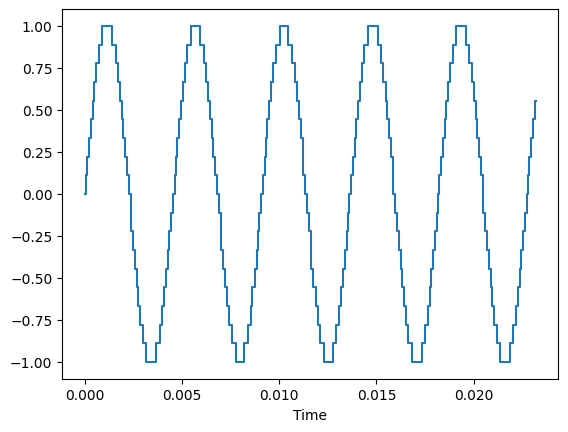

In [57]:
librosa.display.waveshow(sin_q[:512])

# Quantization of music

Use [`librosa.load`](https://librosa.org/doc/latest/generated/librosa.load.html#librosa.load) to load the `samples/095_Coffee_House_10s.wav` music fragment at its original sample frequency (mono). Play the audio signal, plot the waveform (librosa's waveshow) and its spectrogram.

In [78]:
coffee, fs = librosa.load("samples/095_Coffee_House_10s.wav", mono=True)
ipd.Audio(coffee, rate=fs)

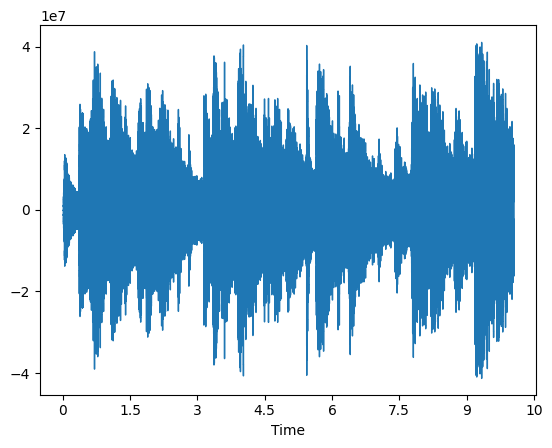

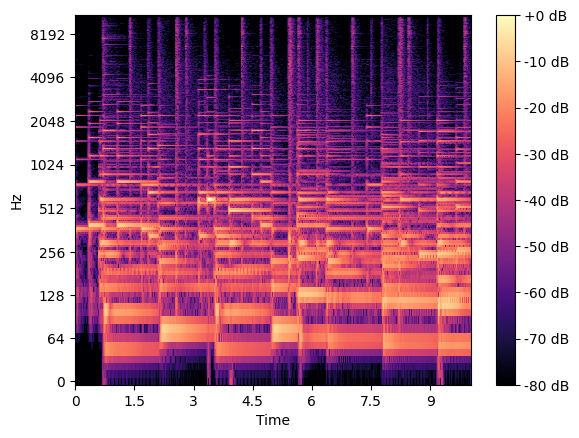

In [72]:
librosa.display.waveshow(coffee)
plt.show()
stft_coffee = librosa.stft(coffee)
stft_coffee_mag_db = librosa.amplitude_to_db(S=np.abs(stft_coffee), ref=np.max)
librosa.display.specshow(data=stft_coffee_mag_db, y_axis='log', x_axis='time', sr=fs)
plt.colorbar(format='%+2.0f dB')


Quantize the music signal to 8-bit and listen to it. Do you notice any difference between the quantized audio signal and the original one?

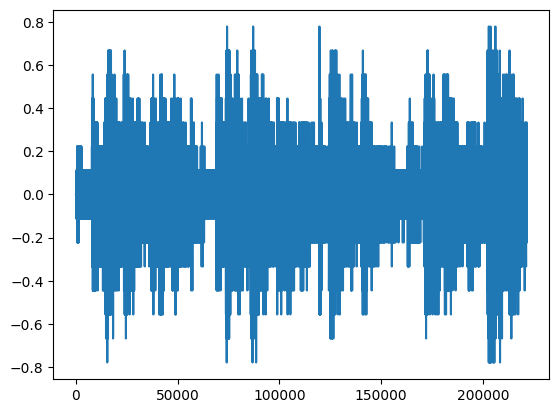

In [79]:
coffee_q = quantize(coffee, 4)

plt.plot(coffee_q)

ipd.Audio(coffee_q, rate=fs)

Display the waveform (librosa's waveshow) and its spetrogram.

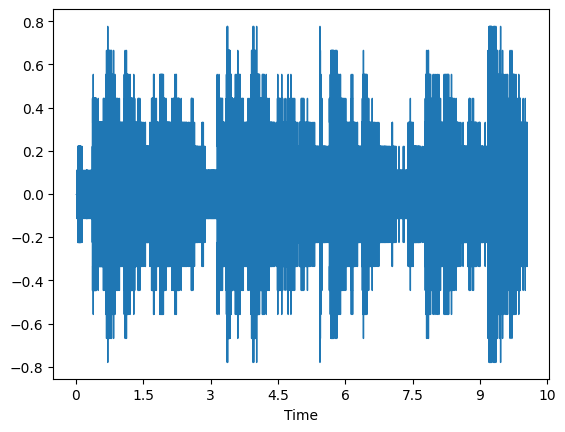

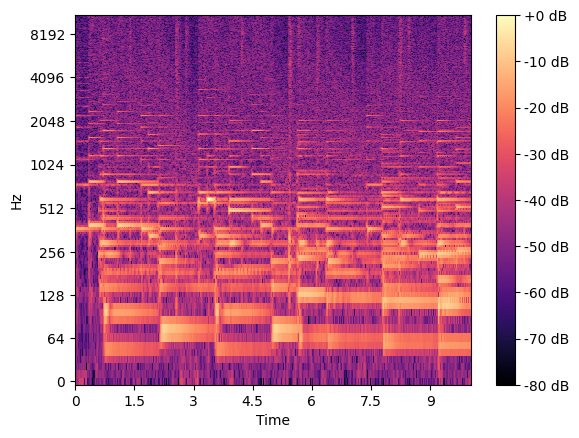

In [80]:
librosa.display.waveshow(coffee_q)
plt.show()
stft_coffee_q = librosa.stft(coffee_q)
stft_coffee_q_mag_db = librosa.amplitude_to_db(S=np.abs(stft_coffee_q), ref=np.max)
librosa.display.specshow(data=stft_coffee_q_mag_db, y_axis='log', x_axis='time', sr=fs)
plt.colorbar(format='%+2.0f dB')

Write a function that calculates the quantization noise level $n_l$ using this equation:

$n_l = max(|s - s_q|)$

where $s$ and $s_q$ are the STFT magnitude of the clean and quantized signal, respectively.
The function should also play the quantized audio signal and display the spectrogram of the noise signal.

Call the function with 4, 6, 8 and 16 bits as a function parameter and print out the noise levels $n_l$ in dB.

[ 0.          0.          0.         ... -0.11111111 -0.11111111
 -0.11111111]


/tmp/ipykernel_6596/2114044206.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  noise = np.abs(librosa.amplitude_to_db(librosa.stft(original_signal), ref=np.max) - librosa.amplitude_to_db(librosa.stft(quantized_signal), ref=np.max))


50.142273

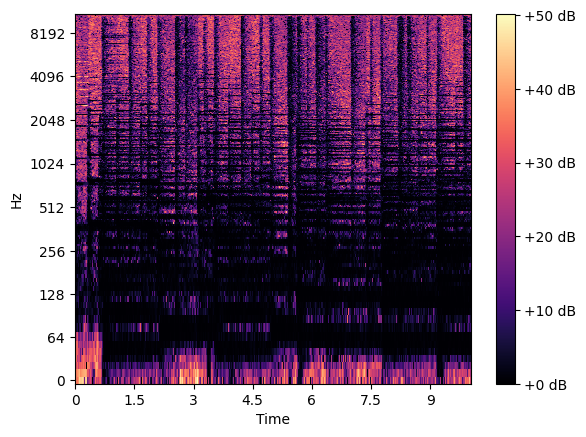

In [104]:
def calc_quantization_noise(original_signal: np.array, quantized_signal: np.array, fs: int) -> np.array:
    noise = np.abs(librosa.amplitude_to_db(librosa.stft(original_signal), ref=np.max) - librosa.amplitude_to_db(librosa.stft(quantized_signal), ref=np.max))

    librosa.display.specshow(data=noise, y_axis='log', x_axis='time', sr=fs)
    plt.colorbar(format='%+2.0f dB')

    print(quantized_signal)

    display(ipd.Audio(quantized_signal, rate=fs))

    return np.max(noise)

coffee, fs = librosa.load("samples/095_Coffee_House_10s.wav", mono=True)

calc_quantization_noise(coffee, quantize(coffee, 4), fs)

# Quantization and dither

Dither is an intentional-applied form of noise, used to randomize the quantization error. This reduces frequency patterns introduced through quantization. Dither is commonly used as one of the last stages of mastering audio to a CD or other digital formats with lower bitrate.

Extend your quantization function with dither. Use [`np.random.rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) to create a random noise sample with the same length as the input sample. Add the noise sample to the input sample just before you call `np.round`. At that point (when the audio signal is in range $[-2^{b-1}, 2^{b-1}-1]$ with $b$ the number of bits), the amplitude of the noise should not exceed $[-0.25, 0.25]$.
Add a boolean function argument that can enable dithering.

Play the quantized dithered signal. Notice how the spectral bands in the spectrogram, introduced by the quantization, disappear.

In [ ]:
# ... WRITE YOUR CODE HERE ... #

Plot the waveform and spectrogram

In [ ]:
# ... WRITE YOUR CODE HERE ... #